In [1]:
# importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# reading csv file

data = pd.read_csv('churn_clean.csv')

In [3]:
# Checking for missing values

data.isna().any(axis=0).any()

False

In [4]:
# checking how many unique values are in each column

data.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

In [5]:
# printing columns with more than 100 unique values, these columns will be either numerical or have too many unique values that they should be left out

for col in data.columns:
    if data[col].nunique()>100:
        print(col)

CaseOrder
Customer_id
Interaction
UID
City
County
Zip
Lat
Lng
Population
Job
Income
Outage_sec_perweek
Tenure
MonthlyCharge
Bandwidth_GB_Year


In [6]:
# dropping columns with higher number of of unique values

to_drop = ['City','County','Zip','Job','TimeZone', 'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder']
data.drop(columns=to_drop,inplace=True)
data.shape

(10000, 39)

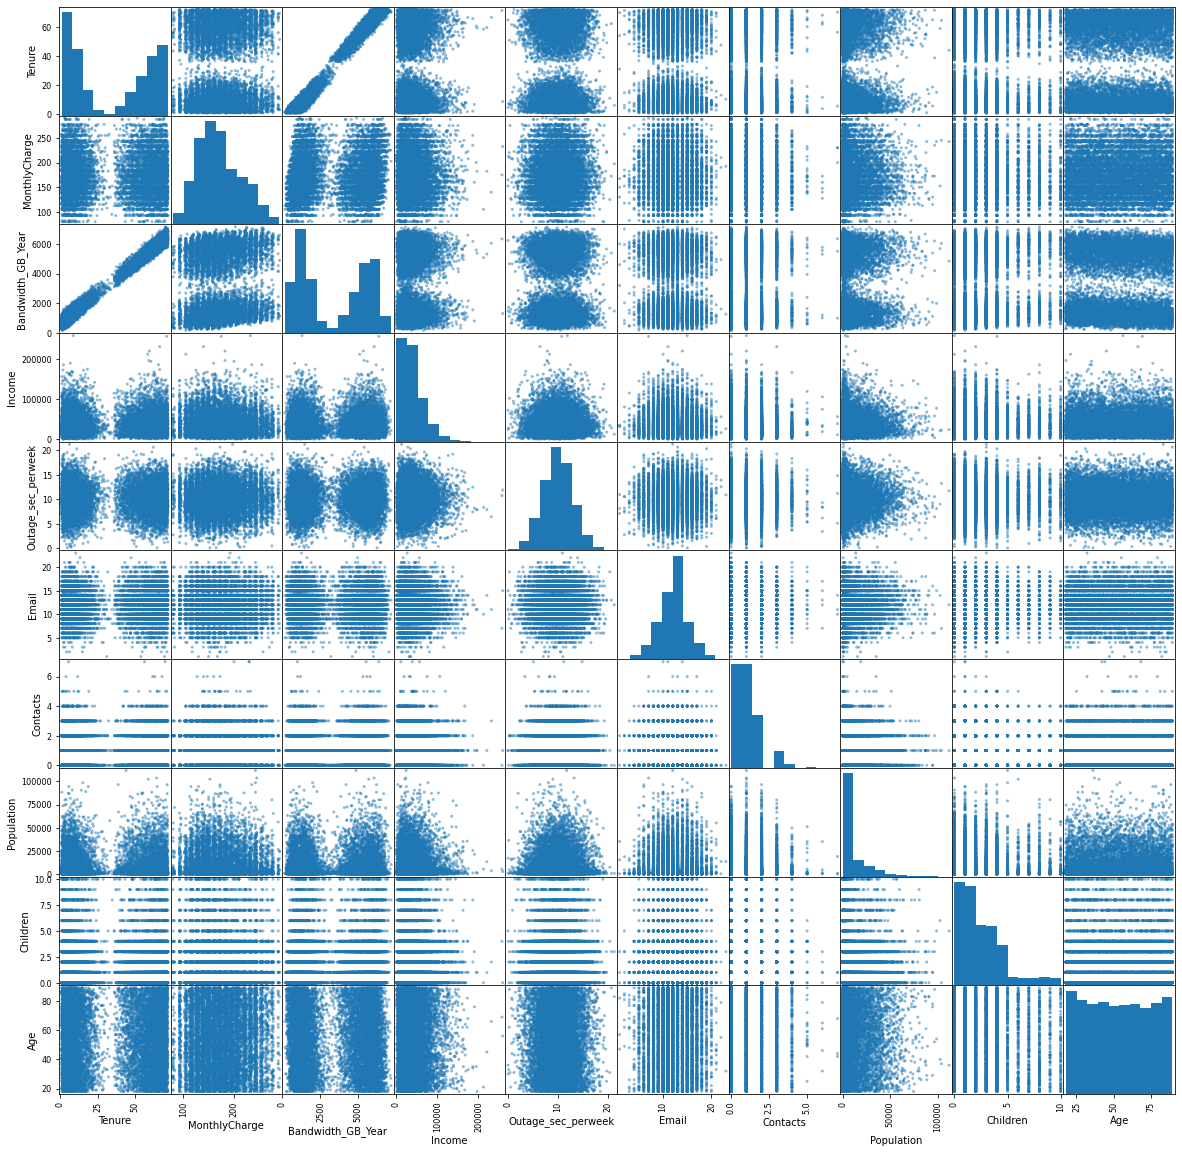

<Figure size 432x288 with 0 Axes>

In [7]:
# plotting scatter plot of each numerical column vs others

pd.plotting.scatter_matrix(data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']], figsize=(20, 20))
plt.show()
plt.savefig('correlation.png')

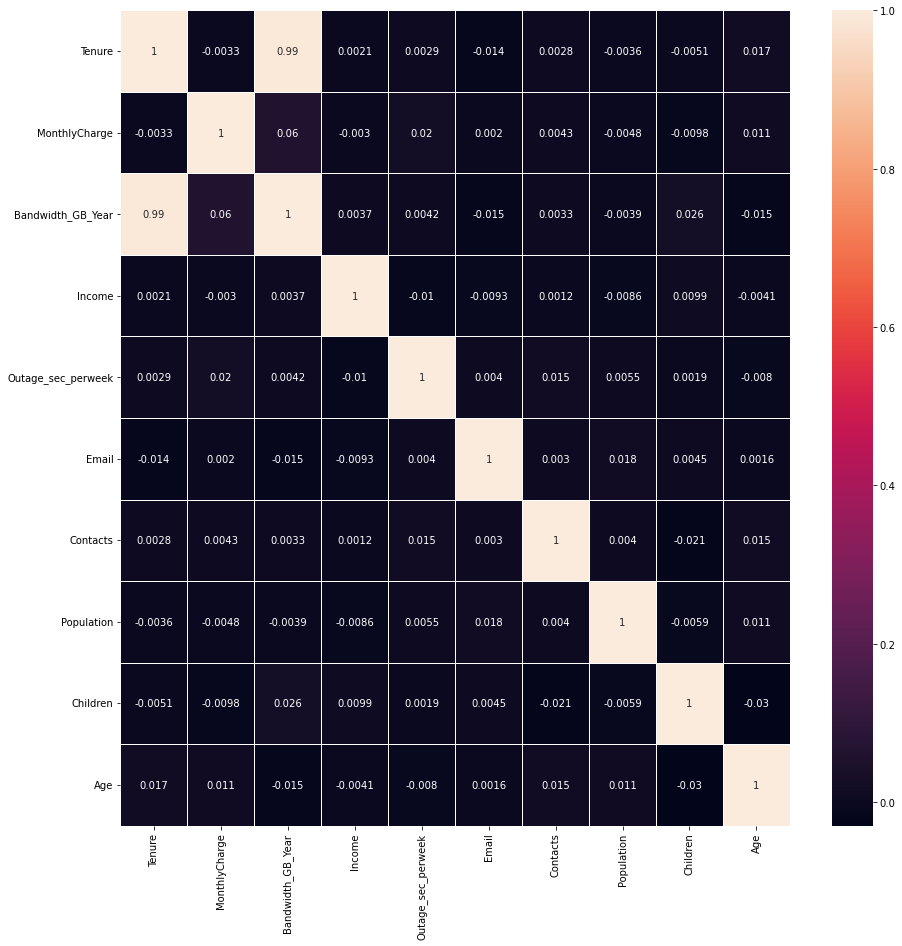

In [8]:
# plotting correlations plot of each numerical column vs others

plt.subplots(figsize=(15,15))
df = data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']]
sns.heatmap(df.corr(),annot=True,lw=1);

In [9]:
categorical_columns = ['State','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet',
                       'InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup',
                       'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies',
                       'PaperlessBilling','PaymentMethod'
                      ]

numerical_columns = ['Population','Children','Age','Income','Outage_sec_perweek','Email',
                     'Contacts','Yearly_equip_failure','Tenure',
                     'MonthlyCharge','Bandwidth_GB_Year'
                    ]

dummy_data_file_index = 0

In [10]:
def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    # dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Churn']
    dummy_data.drop(columns=['Churn'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(categorical_columns, data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.2, random_state=0)

In [12]:
# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
arr = np.c_[X_train.columns.tolist(), model.coef_.tolist()[0]]
intercept = model.intercept_
# print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
y_pred = model.predict(X_test)
print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
print('\nPrinting Accuracy:\n',(accuracy_score(y_test, y_pred)))
print('\nPrinting F1-Score:\n',(f1_score(y_test, y_pred, pos_label="Yes")))


Printing predicted and actual values from sklearn:
 [['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ...
 ['No' 'Yes']
 ['No' 'Yes']
 ['No' 'No']]

Printing Accuracy:
 0.8445

Printing F1-Score:
 0.6836215666327569


In [13]:
equation = 'y = '
for ar in arr:
    eq = str(round(float(ar[1]),3))+' x '+str(ar[0])
    if eq.startswith('-'):
        equation = equation + ' ' + eq
    else:
        equation = equation + ' + ' +eq

print("Equation for model without data preparation:")
print (equation + ' ' + str(intercept))

Equation for model without data preparation:
y =  -0.0 x Population -0.049 x Children + 0.001 x Age -0.0 x Income -0.082 x Outage_sec_perweek -0.092 x Email -0.014 x Contacts -0.01 x Yearly_equip_failure -0.306 x Tenure + 0.02 x MonthlyCharge + 0.003 x Bandwidth_GB_Year -0.072 x Item1 -0.068 x Item2 -0.067 x Item3 -0.073 x Item4 -0.083 x Item5 -0.065 x Item6 -0.073 x Item7 -0.068 x Item8 -0.0 x State_AL -0.001 x State_AR -0.0 x State_AZ -0.0 x State_CA -0.001 x State_CO -0.0 x State_CT + 0.0 x State_DC + 0.0 x State_DE -0.003 x State_FL + 0.0 x State_GA -0.0 x State_HI -0.001 x State_IA -0.0 x State_ID -0.002 x State_IL -0.001 x State_IN + 0.0 x State_KS -0.001 x State_KY + 0.0 x State_LA -0.001 x State_MA + 0.0 x State_MD -0.0 x State_ME + 0.0 x State_MI -0.002 x State_MN + 0.001 x State_MO + 0.0 x State_MS + 0.0 x State_MT -0.002 x State_NC -0.002 x State_ND -0.001 x State_NE -0.0 x State_NH -0.001 x State_NJ -0.0 x State_NM -0.001 x State_NV -0.006 x State_NY -0.001 x State_OH + 0.0

In [14]:
data_reduced = data[[ 'Children', 'Age', 'Gender',  'InternetService', 'Multiple', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Tenure', 'Bandwidth_GB_Year',
                     'MonthlyCharge', 'Contract', 'Churn' ]]

dummy_variable_columns = ['Gender', 'InternetService', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','Contract'
                         ]


data_diff = [i for i in data.columns.tolist() + data_reduced.columns.tolist() if i not in data.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variable_columns, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)

In [15]:
data_diff

['State',
 'Population',
 'Area',
 'Income',
 'Marital',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'PaperlessBilling',
 'PaymentMethod',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [16]:
# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
arr = np.c_[X_train.columns.tolist(), model.coef_.tolist()[0]]
intercept = model.intercept_
# print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
y_pred = model.predict(X_test)
print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
print('\nPrinting Accuracy:\n',(accuracy_score(y_test, y_pred)))
print('\nPrinting F1-Score:\n',(f1_score(y_test, y_pred, pos_label="Yes")))


Printing predicted and actual values from sklearn:
 [['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ...
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']]

Printing Accuracy:
 0.8973333333333333

Printing F1-Score:
 0.8060453400503778


In [17]:
equation = 'y = '
for ar in arr:
    eq = str(round(float(ar[1]),3))+' x '+str(ar[0])
    if eq.startswith('-'):
        equation = equation + ' ' + eq
    else:
        equation = equation + ' + ' +eq

print("Equation for model with reduced data:")
print (equation + ' ' + str(intercept))

Equation for model with reduced data:
y =  -0.045 x Children + 0.002 x Age -0.208 x Tenure + 0.001 x Bandwidth_GB_Year + 0.018 x MonthlyCharge + 0.055 x Gender_Male -0.109 x Gender_Nonbinary -1.044 x InternetService_Fiber Optic -0.662 x InternetService_None + 0.932 x Multiple_Yes -0.301 x OnlineSecurity_Yes + 0.307 x OnlineBackup_Yes + 0.22 x DeviceProtection_Yes + 0.036 x TechSupport_Yes + 1.792 x StreamingTV_Yes + 2.006 x StreamingMovies_Yes -3.185 x Contract_One year -3.221 x Contract_Two Year [-3.36190523]
